In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



First few rows:
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 

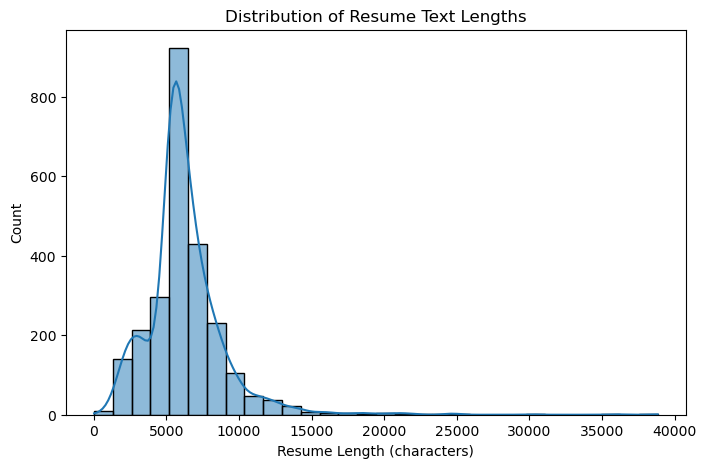

In [4]:
#data from https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset 

df_resume = pd.read_csv(r"C:\Users\User\Downloads\Resume (1).csv")

#preview
print("\nFirst few rows:")
print(df_resume.head())

#structure
print("\nDataset Info:")
print(df_resume.info())

#missing values
print("\nMissing values per column:")
print(df_resume.isnull().sum())

#unique categories
if "Category" in df_resume.columns:
    print("\nUnique Categories:", df_resume["Category"].nunique())
    print(df_resume["Category"].value_counts())

# resume Lengths
df_resume["Resume_Length"] = df_resume["Resume_str"].astype(str).apply(len)
print("\nSummary of Resume Lengths:")
print(df_resume["Resume_Length"].describe())

# Plot Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_resume["Resume_Length"], bins=30, kde=True)
plt.title("Distribution of Resume Text Lengths")
plt.xlabel("Resume Length (characters)")
plt.ylabel("Count")
plt.show()


In [5]:
# html and str had the same content in varied formats
df_resume = df_resume.drop(columns=["Resume_html"], errors='ignore')

df_resume["Resume_Length"] = df_resume["Resume_str"].apply(len)

# check percentiles
low_percentile = df_resume["Resume_Length"].quantile(0.05)  # 5th percentile
high_percentile = df_resume["Resume_Length"].quantile(0.95)  # 95th percentile

print(f"Resume length at 5th percentile: {low_percentile:.2f} characters")
print(f"Resume length at 95th percentile: {high_percentile:.2f} characters")

# Number of resumes below 5th percentile
low_outliers = (df_resume["Resume_Length"] <= low_percentile).sum()
print(f"Number of resumes below 5th percentile: {low_outliers}")

# Number of resumes above 95th percentile
high_outliers = (df_resume["Resume_Length"] >= high_percentile).sum()
print(f"Number of resumes above 95th percentile: {high_outliers}")

# Keep resumes between 5th and 95th percentile
df_resume = df_resume[
    (df_resume["Resume_Length"] > low_percentile) &
    (df_resume["Resume_Length"] < high_percentile)
]

# drop helper column
df_resume = df_resume.drop(columns=["Resume_Length"])

# Reset index
df_resume = df_resume.reset_index(drop=True)

print("\nAfter percentile-based cleaning (5%-95%):")
print(df_resume.info())


Resume length at 5th percentile: 2436.15 characters
Resume length at 95th percentile: 10792.60 characters
Number of resumes below 5th percentile: 125
Number of resumes above 95th percentile: 125

After percentile-based cleaning (5%-95%):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2234 entries, 0 to 2233
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2234 non-null   int64 
 1   Resume_str  2234 non-null   object
 2   Category    2234 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.5+ KB
None


In [10]:
print("Number of rows in df_resume:", len(df_resume))
print(df_resume.head())

Number of rows in df_resume: 2234
         ID                                         Resume_str Category
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...       HR
2  33176873           HR DIRECTOR       Summary      Over 2...       HR
3  27018550           HR SPECIALIST       Summary    Dedica...       HR
4  17812897           HR MANAGER         Skill Highlights  ...       HR


In [15]:
final_resume_save_path = "Resume-cleaned.csv"

# Save the cleaned dataset to CSV
df_resume.to_csv(final_resume_save_path, index=False, encoding="utf-8")

print(f"Cleaned Resume dataset saved at: {final_resume_save_path}")

Cleaned Resume dataset saved at: Resume-cleaned.csv
